In [ ]:
# About Data, Statistics & Visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', 100)
import scipy.stats as stats

# Feature Engineering - Preprocessing
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro, kstest, normaltest
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold

**Data Information**

In [ ]:
dataset = pd.read_csv('Dataset Customer Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
cat = list(dataset.select_dtypes(include=object))
num = list(dataset.select_dtypes(exclude=object))

In [ ]:
print('Categorical Features: ', cat)
print('Numerical Features: ', num)

Categorical Features:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical Features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset.TotalCharges, errors='coerce')

* *The TotalCharges feature needs to be changed to a numeric data type because it has a value that indicates the magnitude of the number.*

**Data Cleansing**

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset['customerID'].nunique()

7043

* *There are no duplicated data from the dataset, which means every single row represent one customer*

In [ ]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


* *Feature TotalCharges has 11 missing values, so lets check the data*

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
dataset[dataset['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
dataset.drop(labels=dataset[dataset['tenure'] == 0].index, axis=0, inplace=True)
dataset[dataset['tenure'] == 0].index

Index([], dtype='int64')

* *To solve problem of missing value, i decide to remove the rows because there are only 11 rows.*

In [ ]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

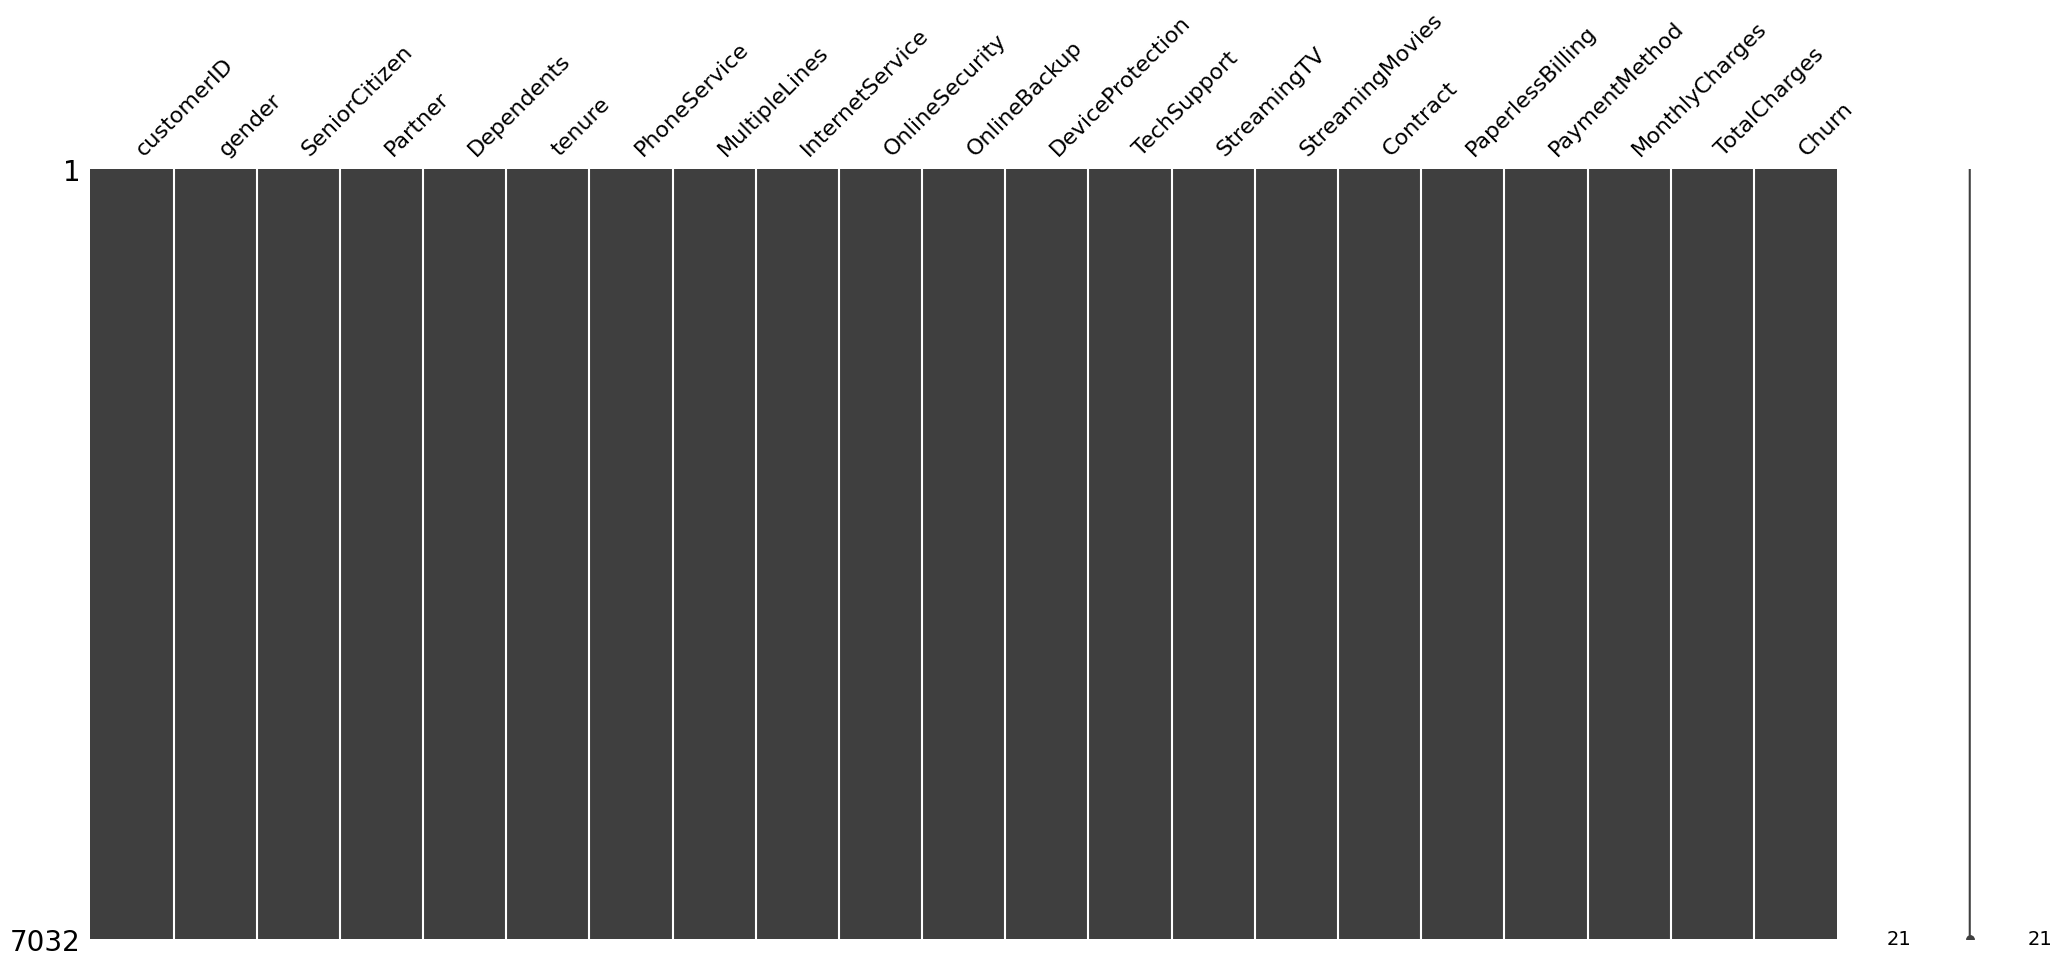

In [ ]:
msno.matrix(dataset)

* *From the visualization above, it can be seen that there is no anomalous pattern.*

In [ ]:
listItem = []

for col in dataset.columns:
    listItem.append([col, dataset[col].dtype, dataset[col].isna().sum(), round((dataset[col].isna().sum()/len(dataset[col]))*100, 2),
                    dataset[col].nunique()]);

dataset_describe = pd.DataFrame(columns=['Features', 'TypeData', 'NullValues', '%Null', 'Unique'],
                     data=listItem)
dataset_describe

,Features,TypeData,NullValues,%Null,Unique
0,customerID,object,0,0.0,7032
1,gender,object,0,0.0,2
2,SeniorCitizen,int64,0,0.0,2
3,Partner,object,0,0.0,2
4,Dependents,object,0,0.0,2
5,tenure,int64,0,0.0,72
6,PhoneService,object,0,0.0,2
7,MultipleLines,object,0,0.0,3
8,InternetService,object,0,0.0,3
9,OnlineSecurity,object,0,0.0,3


**Exploratory Data Analysis**

In [ ]:
#1. Normality Check
def check_normality(df, column, method="shapiro"):
    """
    Checks the normality of a dataset column using statistical tests.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to test for normality.
        method (str): The normality test to use ("shapiro", "kstest", "dagostino").

    Returns:
        dict: A dictionary with the test results, including the test statistic and p-value.
    """
    if method == "shapiro":
        stat, p_value = shapiro(df[column])
        test_name = "Shapiro-Wilk Test"
    elif method == "kstest":
        # Kolmogorov-Smirnov test assumes normal distribution with mean and std from the data
        stat, p_value = kstest(df[column], 'norm', args=(df[column].mean(), df[column].std()))
        test_name = "Kolmogorov-Smirnov Test"
    else:
        raise ValueError("Invalid method. Choose 'shapiro', or 'kstest'.")

    result = {
        "Test": test_name,
        "Statistic": stat,
        "p_value": p_value,
        "Normality": "Pass (data is normal)" if p_value > 0.05 else "Fail (data is not normal)"
    }
    return result

#2. Outlier Detection
def outlier(column):
    ## q
    q1 = column.describe()['25%']
    q2 = column.describe()['50%']
    q3 = column.describe()['75%']
    ## IQR
    iqr = q3 - q1
    ## Outliers
    min_IQR = q1 - 1.5 * iqr
    max_IQR = q3 + 1.5 * iqr
    low_out = []
    high_out = []
    for value in column:
        if (value < min_IQR):
            low_out.append(value)
        if (value > max_IQR):
            high_out.append(value)
    print(column.name)
    print('------------------------')
    ## Boundaries
    print('Lower Boundary \t: ', min_IQR)
    print('Upper Boundary \t: ', max_IQR)
    print()
    ## Count of Outlier(s)
    print('Count of Low Outlier(s) \t: ', len(low_out))
    print('Count of High Outlier(s) \t: ', len(high_out))
    print()
    ## Outliers List
    print('Low Outlier(s) List \t: ', low_out)
    print('High Outlier(s) List \t: ', high_out)

#3. Spearman Correlation
def corr_spearman(c):
    plt.figure(figsize = (8,6))
    mask_ = np.zeros_like(c.corr(method='spearman'))
    mask_[np.triu_indices_from(mask_)] = True
    sns.heatmap(c.corr(method='spearman'), mask = mask_, annot=True, cmap = 'RdYlGn')
    plt.title('Correlation Heatmap', size = 16)
    plt.show()

#4. VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

#5. Cramers'V
def cramers_v(df, x, y):
    try:
        cont_table = pd.crosstab(index=df[x], columns=df[y])

        if cont_table.size == 0 or cont_table.values.sum() == 0:
            return np.nan, np.nan

        chi2_test = stats.chi2_contingency(cont_table, correction=False)
        chi2, p = chi2_test[0], chi2_test[1]
        n = cont_table.sum().sum()
        phi2 = chi2/n
        r, k = cont_table.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        if min((kcorr-1), (rcorr-1)) == 0:
            return np.nan, np.nan
        coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
        return round(coeff, 3), round(p, 3)
    except Exception as e:
        warnings.warn(f"Error calculating Cramer's V for {x} and {y}: {str(e)}")
        return np.nan, np.nan

def select_features_cramers_v(df, target_column, threshold=0.3, p_value_threshold=0.05):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    results = []

    for col in categorical_columns:
        if col != target_column:
            coeff, p_value = cramers_v(df, col, target_column)
            results.append({'Feature': col, 'Cramer_V': coeff, 'P_Value': p_value})

    results_df = pd.DataFrame(results).sort_values('Cramer_V', ascending=False)
    selected_features = results_df[(results_df['Cramer_V'] >= threshold) & (results_df['P_Value'] <= p_value_threshold)]['Feature'].tolist()

    return selected_features, results_df

def analyze_feature_selection(selected_features, results_df):
    analysis = "Feature Selection Analysis:\n\n"

    if len(selected_features) == 0:
        analysis += "No features were selected based on the given criteria. Consider adjusting the threshold or p-value criteria.\n"
    else:
        analysis += f"{len(selected_features)} features were selected:\n"
        for feature in selected_features:
            cramer_v = results_df.loc[results_df['Feature'] == feature, 'Cramer_V'].values[0]
            p_value = results_df.loc[results_df['Feature'] == feature, 'P_Value'].values[0]
            analysis += f"- {feature} (Cramer's V: {cramer_v:.3f}, p-value: {p_value:.3f})\n"

        analysis += "\nInterpretation:\n"
        analysis += "- Cramer's V ranges from 0 (no association) to 1 (perfect association).\n"
        analysis += "- Generally, Cramer's V values can be interpreted as:\n"
        analysis += "  * 0.00 to 0.10: Negligible association\n"
        analysis += "  * 0.10 to 0.30: Weak association\n"
        analysis += "  * 0.30 to 0.50: Moderate association\n"
        analysis += "  * 0.50 to 0.70: Strong association\n"
        analysis += "  * 0.70 to 1.00: Very strong association\n\n"

        strongest_feature = results_df.iloc[0]['Feature']
        strongest_cramer_v = results_df.iloc[0]['Cramer_V']
        analysis += f"The strongest association is with '{strongest_feature}' (Cramer's V: {strongest_cramer_v:.3f}).\n"

        weak_features = results_df[results_df['Cramer_V'] < 0.3]['Feature'].tolist()
        if weak_features:
            analysis += f"\nFeatures with weak associations (Cramer's V < 0.3): {', '.join(weak_features)}\n"
            analysis += "Consider investigating these features further or potentially removing them from the model.\n"

    return analysis

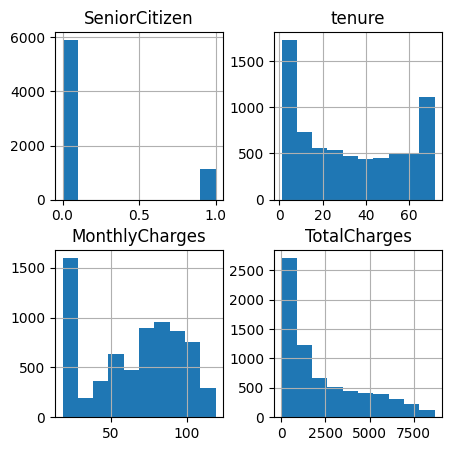

In [ ]:
dataset.hist(figsize=(5,5))
plt.show()

Proportion Churn

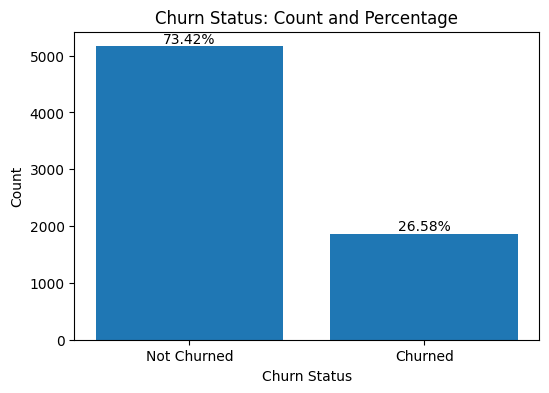

In [ ]:
churn_summary = dataset['Churn'].value_counts().reset_index()
churn_summary.columns = ['Churn Status', 'Count']
churn_summary['Percentage'] = (churn_summary['Count']/len(dataset))*100

# Plot the data
plt.figure(figsize=(6, 4))
bars = plt.bar(churn_summary['Churn Status'], churn_summary['Count'])

# Add annotations for percentage
for bar, percentage in zip(bars, churn_summary['Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height(),  # y-coordinate (height of the bar)
        f'{percentage:.2f}%',  # Percentage text
        ha='center', va='bottom', fontsize=10, color='black'  # Center align the text
    )

# Customize the plot
plt.title('Churn Status: Count and Percentage')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()

* *The ratio of non-churn customers to churned customers is 73.42% : 26.58%. This can be interpreted that churned customers are very low.*

Distribution of Tenure

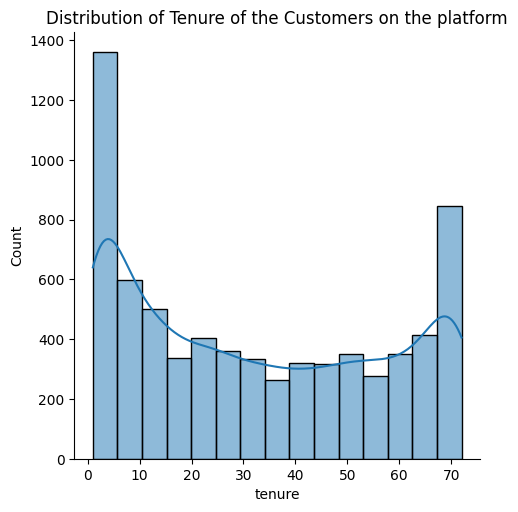

In [ ]:
sns.displot(x='tenure', kde=True, data=dataset)
plt.title('Distribution of Tenure of the Customers on the platform')
plt.show()

In [ ]:
outlier(dataset['tenure'])

tenure
------------------------
Lower Boundary 	:  -60.0
Upper Boundary 	:  124.0

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  0

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  []


*  *The initial spike indicates strong marketing efforts in attracting new customers.*
*  *Customer frequency declines steadily over the 10-60 month period, indicating the challenge of retaining customers in the medium term.*
*  *Customers with maximum tenure show high loyalty and satisfaction.*






Customer Contract Distribution

In [ ]:
fig = px.histogram(
    dataset,
    x="Churn",
    color="Contract",
    barmode="group",
    title="<b>Customer contract distribution<b>",
    text_auto=True  # Automatically show counts
)

# Update layout
fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    xaxis_title="Churn Status",
    yaxis_title="Count")

fig.show()

* *Customers with month-to-month contracts tend to have a higher potential for churn than customers with one-year or two-year contracts.*

Distribution of Gender

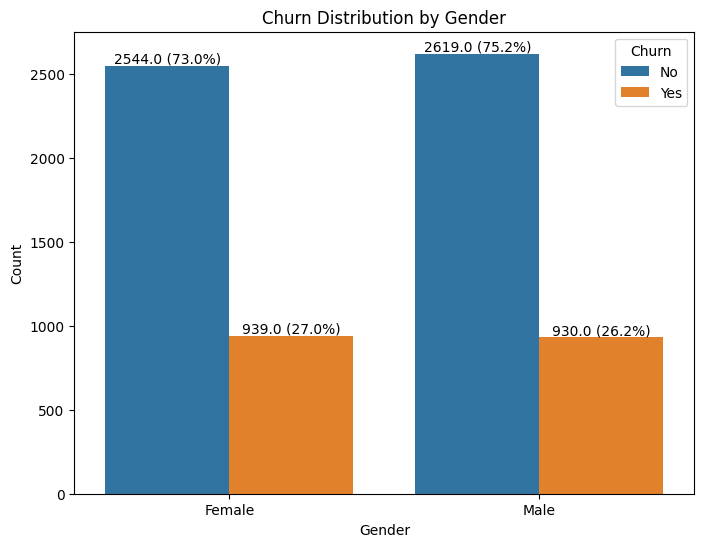

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='gender', hue='Churn')

# Calculate total counts for proportion calculation by gender
total_counts = dataset['gender'].value_counts()

# Annotate each bar with count and proportion
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Bar height (count)
        if height > 0:  # Avoid labeling bars with no height
            gender = bar.get_x()  # Bar index corresponds to gender
            proportion = (height / total_counts[dataset['gender'].unique()[int(gender)]]) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
                height + 0.1,  # Y-coordinate (just above the bar)
                f"{height} ({proportion:.1f}%)",  # Label: count (proportion)
                ha='center', va='bottom', fontsize=10, color='black'
            )

# Add title and labels
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

* *The histogram shows no significant difference for churned and non-churned customers based on gender.*

Distribution of Partner

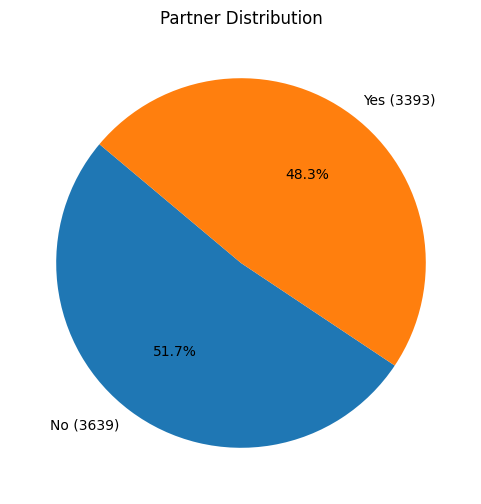

In [ ]:
# Prepare data for pie chart
labels = dataset['Partner'].value_counts().index  # Get unique labels
values = dataset['Partner'].value_counts().values  # Get counts

# Create custom labels with counts and percentages
total = sum(values)
custom_labels = [f"{label} ({count})" for label, count in zip(labels, values)]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Partner Distribution')
plt.show()

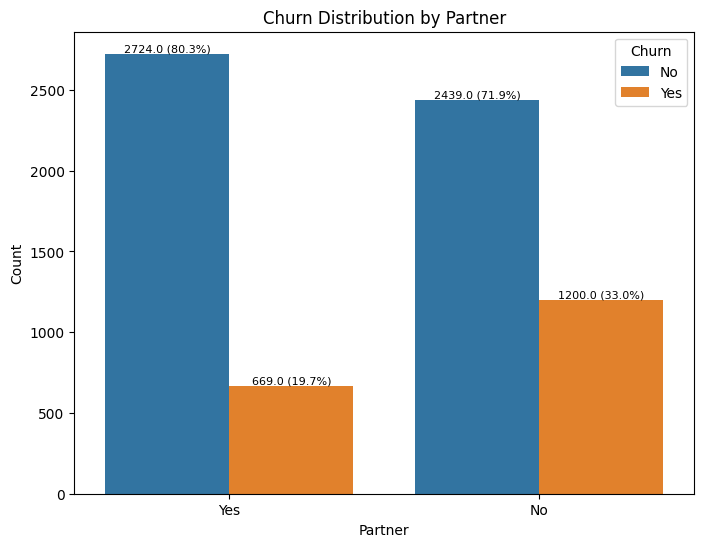

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='Partner', hue='Churn')

# Calculate total counts for proportion calculation by gender
total_counts = dataset['Partner'].value_counts()

# Annotate each bar with count and proportion
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Bar height (count)
        if height > 0:  # Avoid labeling bars with no height
            gender = bar.get_x()  # Bar index corresponds to gender
            proportion = (height / total_counts[dataset['Partner'].unique()[int(gender)]]) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
                height + 0.1,  # Y-coordinate (just above the bar)
                f"{height} ({proportion:.1f}%)",  # Label: count (proportion)
                ha='center', va='bottom', fontsize=8, color='black'
            )

# Add title and labels
plt.title('Churn Distribution by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

* *Customers who do not have a partner are more likely to churn.*

Distribution of Dependents

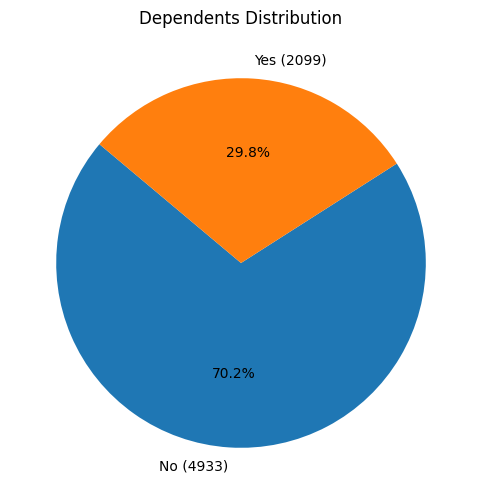

In [ ]:
# Prepare data for pie chart
labels = dataset['Dependents'].value_counts().index  # Get unique labels
values = dataset['Dependents'].value_counts().values  # Get counts

# Create custom labels with counts and percentages
total = sum(values)
custom_labels = [f"{label} ({count})" for label, count in zip(labels, values)]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Dependents Distribution')
plt.show()

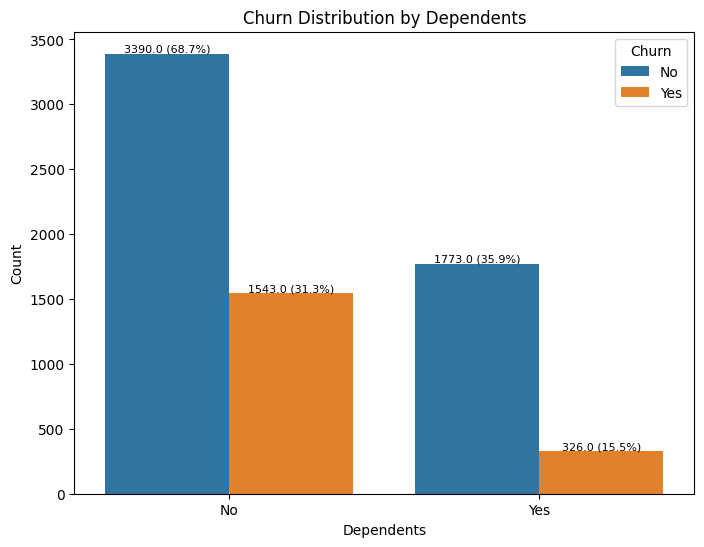

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='Dependents', hue='Churn')

# Calculate total counts for proportion calculation by gender
total_counts = dataset['Dependents'].value_counts()

# Annotate each bar with count and proportion
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Bar height (count)
        if height > 0:  # Avoid labeling bars with no height
            gender = bar.get_x()  # Bar index corresponds to gender
            proportion = (height / total_counts[dataset['Dependents'].unique()[int(gender)]]) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
                height + 0.1,  # Y-coordinate (just above the bar)
                f"{height} ({proportion:.1f}%)",  # Label: count (proportion)
                ha='center', va='bottom', fontsize=8, color='black'
            )

# Add title and labels
plt.title('Churn Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

* *Customers who do not have dependents are more likely to churn.*

Phone Service Distribution

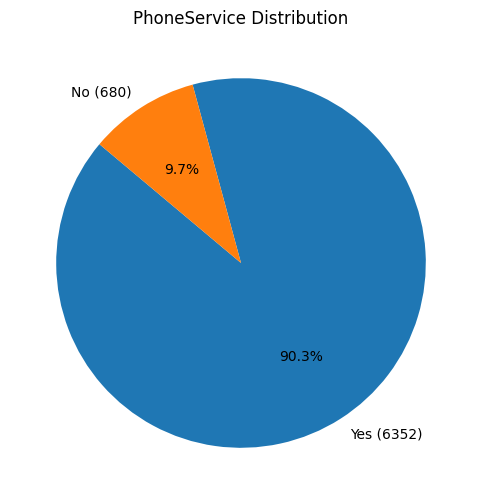

In [ ]:
# Prepare data for pie chart
labels = dataset['PhoneService'].value_counts().index  # Get unique labels
values = dataset['PhoneService'].value_counts().values  # Get counts

# Create custom labels with counts and percentages
total = sum(values)
custom_labels = [f"{label} ({count})" for label, count in zip(labels, values)]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('PhoneService Distribution')
plt.show()

MultipleLines Distribution

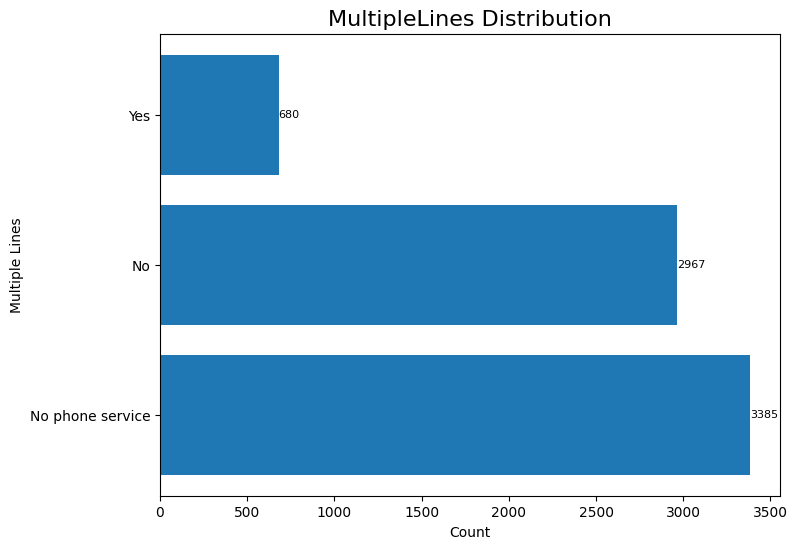

In [ ]:
categories = dataset['MultipleLines'].unique()
counts = dataset['MultipleLines'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("MultipleLines Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Multiple Lines")
plt.show()

InternetService Distribution

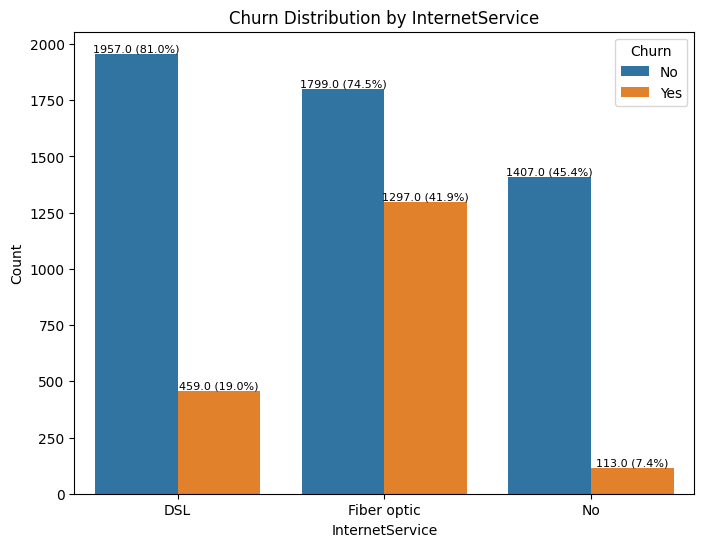

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='InternetService', hue='Churn')

# Calculate total counts for proportion calculation by gender
total_counts = dataset['InternetService'].value_counts()

# Annotate each bar with count and proportion
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Bar height (count)
        if height > 0:  # Avoid labeling bars with no height
            gender = bar.get_x()  # Bar index corresponds to gender
            proportion = (height / total_counts[dataset['InternetService'].unique()[int(gender)]]) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
                height + 0.1,  # Y-coordinate (just above the bar)
                f"{height} ({proportion:.1f}%)",  # Label: count (proportion)
                ha='center', va='bottom', fontsize=8, color='black'
            )

# Add title and labels
plt.title('Churn Distribution by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

* *The large number of customers who choose fiber optic services is followed by a high churn rate, this allows for dissatisfaction with this type of service. While most customers with DSL services have a lower churn rate than fiber optic services.*

OnlineSecurity Distribution

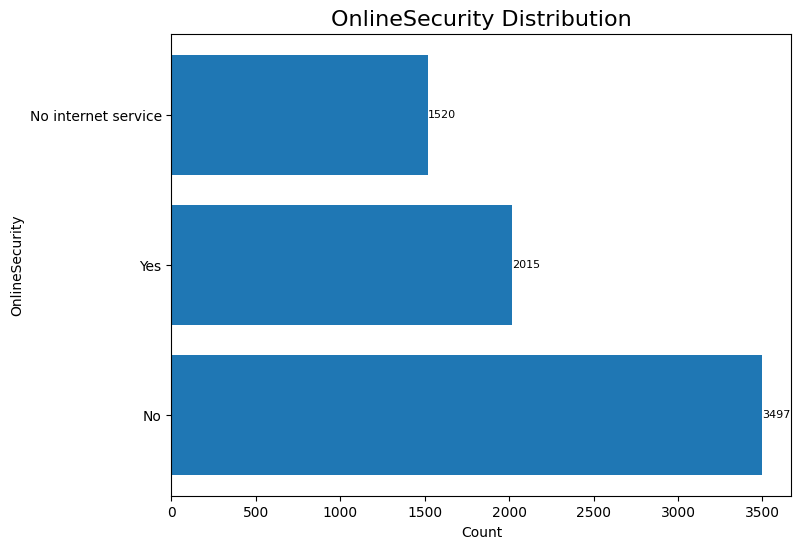

In [ ]:
categories = dataset['OnlineSecurity'].unique()
counts = dataset['OnlineSecurity'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("OnlineSecurity Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("OnlineSecurity")
plt.show()

OnlineBackup Distribution

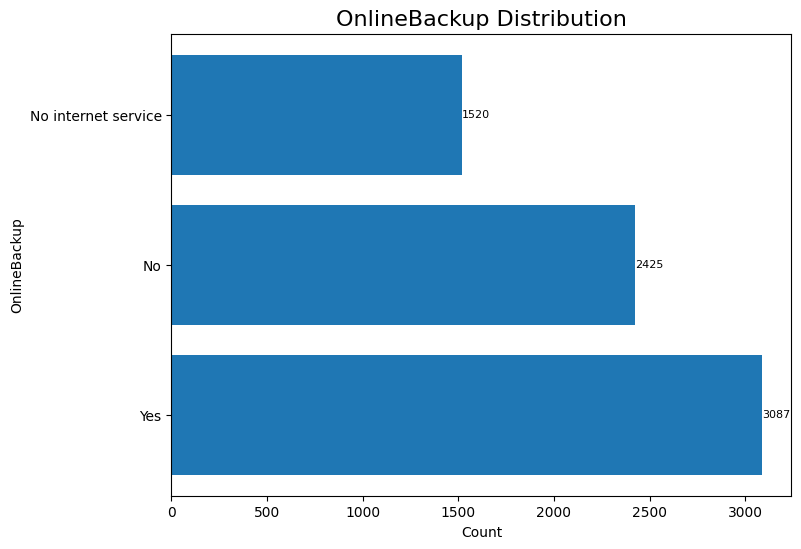

In [ ]:
categories = dataset['OnlineBackup'].unique()
counts = dataset['OnlineBackup'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("OnlineBackup Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("OnlineBackup")
plt.show()

DeviceProtection Distribution

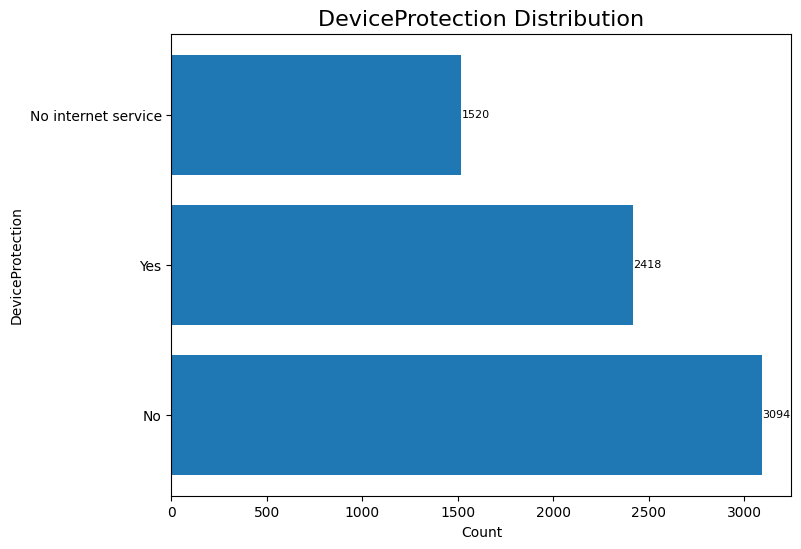

In [ ]:
categories = dataset['DeviceProtection'].unique()
counts = dataset['DeviceProtection'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("DeviceProtection Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("DeviceProtection")
plt.show()

TechSupport Distribution

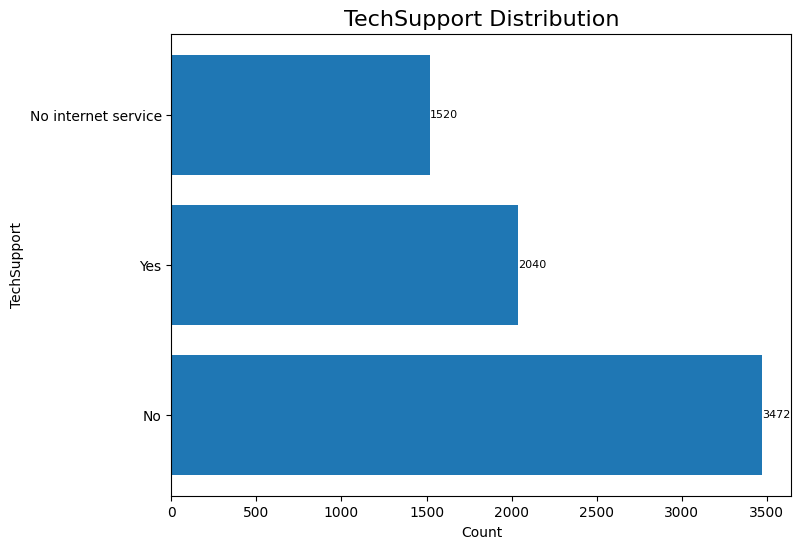

In [ ]:
categories = dataset['TechSupport'].unique()
counts = dataset['TechSupport'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("TechSupport Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("TechSupport")
plt.show()

StreamingTV Distribution

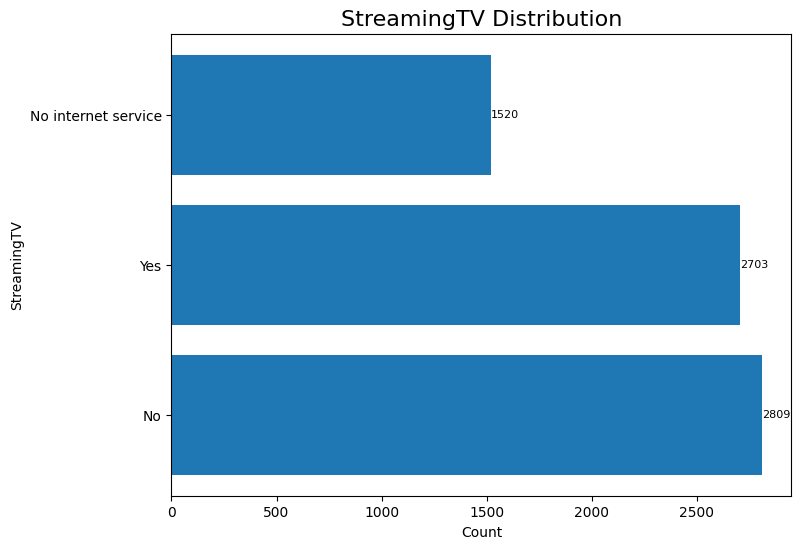

In [ ]:
categories = dataset['StreamingTV'].unique()
counts = dataset['StreamingTV'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("StreamingTV Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("StreamingTV")
plt.show()

StreamingMovie Distribution

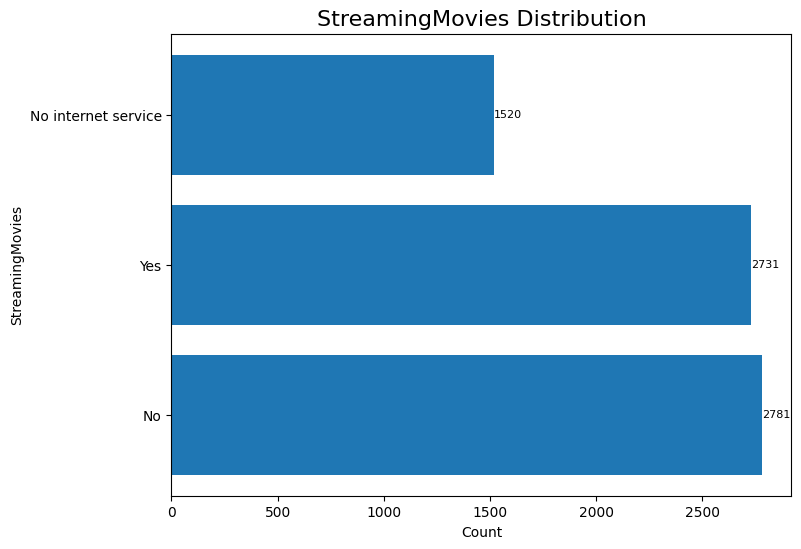

In [ ]:
categories = dataset['StreamingMovies'].unique()
counts = dataset['StreamingMovies'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("StreamingMovies Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("StreamingMovies")
plt.show()

Paperless Billing Distribution

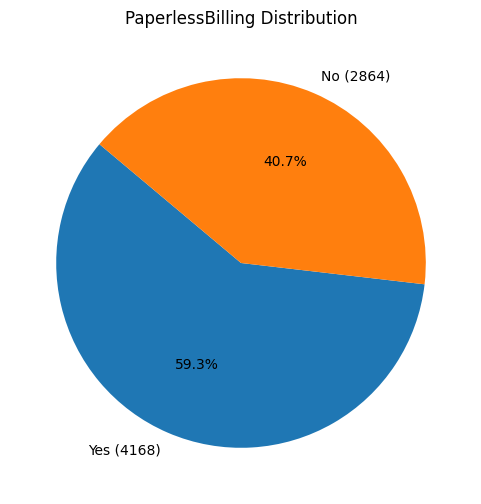

In [ ]:
# Prepare data for pie chart
labels = dataset['PaperlessBilling'].value_counts().index  # Get unique labels
values = dataset['PaperlessBilling'].value_counts().values  # Get counts

# Create custom labels with counts and percentages
total = sum(values)
custom_labels = [f"{label} ({count})" for label, count in zip(labels, values)]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('PaperlessBilling Distribution')
plt.show()

PaymentMethod Distribution

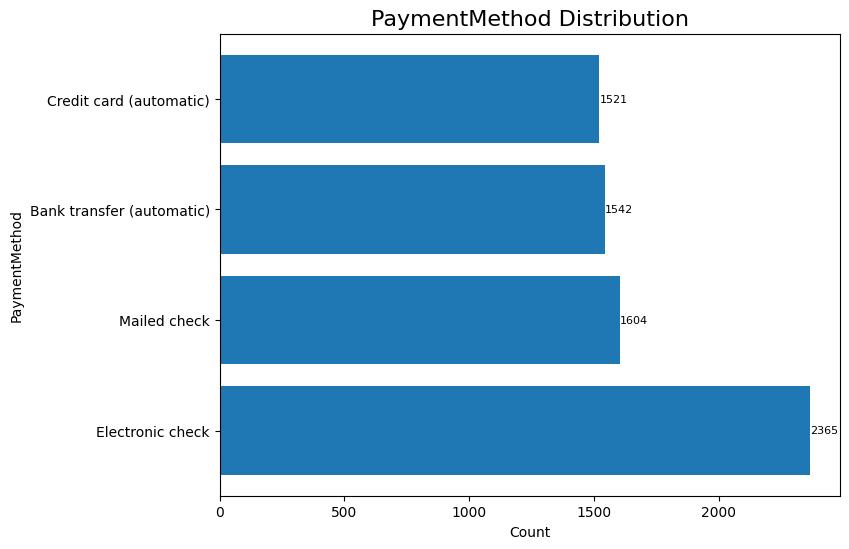

In [ ]:
categories = dataset['PaymentMethod'].unique()
counts = dataset['PaymentMethod'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, counts)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # Bar width represents the count
    plt.text(
        width + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        f'{width}',  # Text showing the count
        va='center', fontsize=8, color='black'
    )

# Customize the plot
plt.title("PaymentMethod Distribution", fontsize=16)
plt.xlabel("Count")
plt.ylabel("PaymentMethod")
plt.show()

* *The majority of customers use electronic checks to make payments.*

MonthlyCharges Distribution

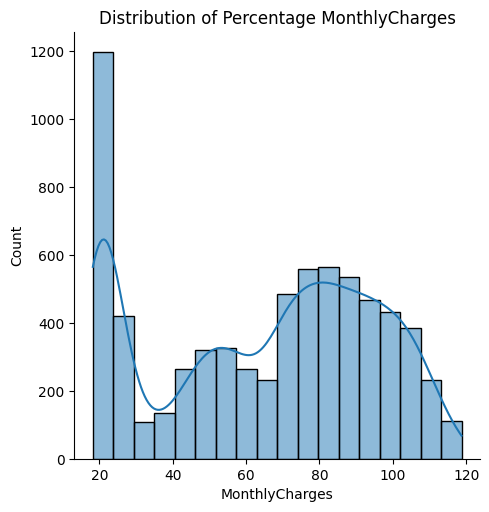

In [ ]:
sns.displot(x='MonthlyCharges', kde=True, data=dataset)
plt.title('Distribution of Percentage MonthlyCharges')
plt.show()

* *Most pay a lower monthly fee, which is in the range of 20-30, representing customers who choose the basic package. The distribution increases and peaks in the range of 60-90, where most customers choose the standard package. While the distribution decreases when the monthly payment is above 90, indicating a lack of interest in customers choosing the premium package.*

In [ ]:
outlier(dataset['MonthlyCharges'])

MonthlyCharges
------------------------
Lower Boundary 	:  -45.824999999999996
Upper Boundary 	:  171.27499999999998

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  0

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  []


TotalCharges Distribution

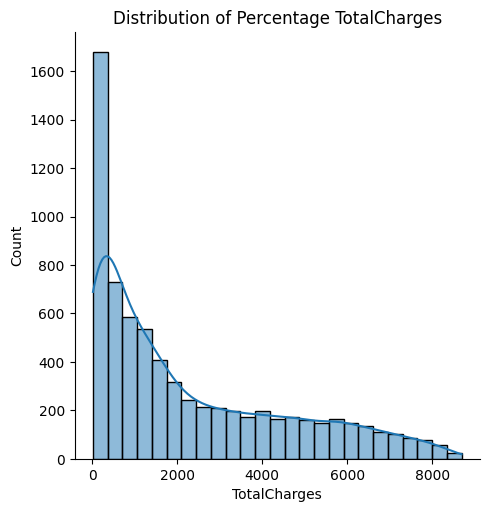

In [ ]:
sns.displot(x='TotalCharges', kde=True, data=dataset)
plt.title('Distribution of Percentage TotalCharges')
plt.show()

In [ ]:
outlier(dataset['TotalCharges'])

TotalCharges
------------------------
Lower Boundary 	:  -4688.481250000001
Upper Boundary 	:  8884.66875

Count of Low Outlier(s) 	:  0
Count of High Outlier(s) 	:  0

Low Outlier(s) List 	:  []
High Outlier(s) List 	:  []


In [ ]:
shapiro_tc = check_normality(dataset, 'TotalCharges', method='shapiro')
kstest_tc = check_normality(dataset, 'TotalCharges', method='kstest')
print('=================================================')
print('Result of Shapiro Wilk Test:', shapiro_tc)

print('=================================================')
print('Result of Kolmogorov-Smirnov Test:', kstest_tc)

Result of Shapiro Wilk Test: {'Test': 'Shapiro-Wilk Test', 'Statistic': 0.8604355593404719, 'p_value': 1.0514047426620282e-61, 'Normality': 'Fail (data is not normal)'}
Result of Kolmogorov-Smirnov Test: {'Test': 'Kolmogorov-Smirnov Test', 'Statistic': 0.15889778904993312, 'p_value': 1.4678016400350736e-155, 'Normality': 'Fail (data is not normal)'}


Correlation Spearman & VIF

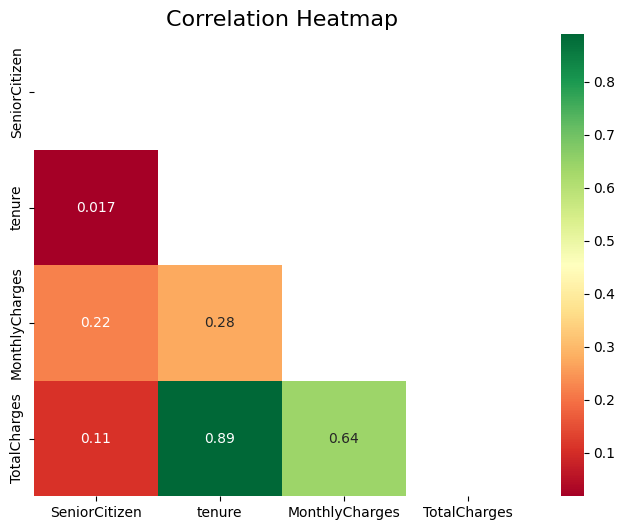

In [ ]:
num = dataset.select_dtypes(exclude=object)
corr_spearman(num)

In [ ]:
vif_df = calculate_vif(num)
print("Initial VIF_MCY_NEW values:\n", vif_df)

Initial VIF_MCY_NEW values:
           feature       VIF
0   SeniorCitizen  1.257569
1          tenure  6.332737
2  MonthlyCharges  3.701617
3    TotalCharges  8.085198


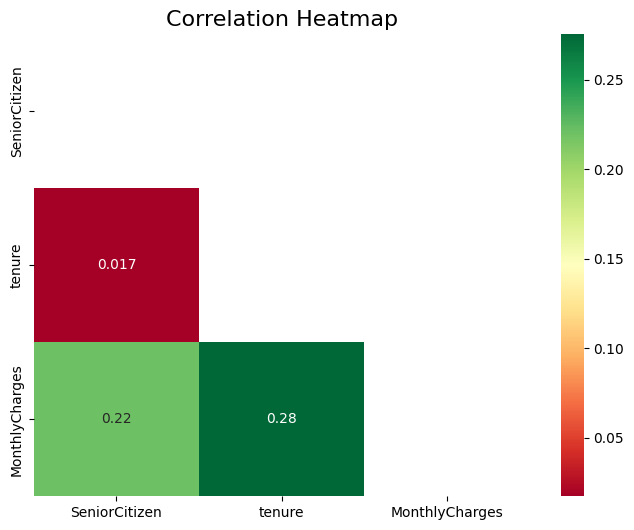

In [ ]:
corr_spearman(num.drop(columns='TotalCharges'))

In [ ]:
vif_df = calculate_vif(num.drop(columns='TotalCharges'))
print("Initial VIF_MCY_NEW values:\n", vif_df)

Initial VIF_MCY_NEW values:
           feature       VIF
0   SeniorCitizen  1.256633
1          tenure  2.620398
2  MonthlyCharges  2.928852


* *Spearman correlation shows that tenure and total charges variables have a very strong relationship, which is 0.89.*
* *VIF is used to detect multicollinearity, in this case TotalCharges has a high multicollinearity value. Therefore, I decided to remove the TotalCharges feature.*
* *From the analysis results, there are 3 numeric features used in the model, namely tenure, MonthlyCharges, and SeniorCitizen.*

Cramers'V

In [ ]:
selected_features, results_df = select_features_cramers_v(dataset.drop(columns='customerID'), 'Churn')
analysis = analyze_feature_selection(selected_features, results_df)
print(analysis)
print(results_df)

Feature Selection Analysis:

5 features were selected:
- Contract (Cramer's V: 0.409, p-value: 0.000)
- OnlineSecurity (Cramer's V: 0.347, p-value: 0.000)
- TechSupport (Cramer's V: 0.342, p-value: 0.000)
- InternetService (Cramer's V: 0.321, p-value: 0.000)
- PaymentMethod (Cramer's V: 0.302, p-value: 0.000)

Interpretation:
- Cramer's V ranges from 0 (no association) to 1 (perfect association).
- Generally, Cramer's V values can be interpreted as:
  * 0.00 to 0.10: Negligible association
  * 0.10 to 0.30: Weak association
  * 0.30 to 0.50: Moderate association
  * 0.50 to 0.70: Strong association
  * 0.70 to 1.00: Very strong association

The strongest association is with 'Contract' (Cramer's V: 0.409).

Features with weak associations (Cramer's V < 0.3): OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, PaperlessBilling, Dependents, Partner, MultipleLines, gender, PhoneService
Consider investigating these features further or potentially removing them from the model.

   

* *From the categorical feature analysis using Cramers'v, 5 categorical features were obtained which were used in the model, including contracts, OnlineSecurity, TechSupport, InternetService, and PaymentMethod.*

**Model Perfomance**

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
feature_selected = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod']
idscol = 'customerID'
target = 'Churn'

In [ ]:
label_encoders = {}
for col in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Split the dataset into training and testing sets
train_df, test_df, label_train, label_test = train_test_split(dataset[feature_selected],
                                                              dataset[target],test_size=0.2, random_state=42, stratify=dataset[target])

# Define the models
models = {
    "SVM": SVC(random_state = 1),
    "XGBoost": XGBClassifier(eval_metric='logloss'),  # Use eval_metric to suppress warnings
    "Logistic Regression": LogisticRegression(max_iter = 1000)
}

# Train the models and compute F1 scores
f1_scores = {}
for model_name, model in models.items():
    model.fit(train_df, label_train)
    y_pred = model.predict(test_df)
    f1_scores[model_name] = f1_score(label_test, y_pred)

# Print the F1 scores
for model_name, f1 in f1_scores.items():
    print(f"{model_name}: F1 Score = {f1}")

# Find the best model
best_model = max(f1_scores, key=f1_scores.get)
print(f"\nBest Model: {best_model} with F1 Score = {f1_scores[best_model]}")

SVM: F1 Score = 0.4882943143812709
XGBoost: F1 Score = 0.5225988700564972
Logistic Regression: F1 Score = 0.5641748942172073

Best Model: Logistic Regression with F1 Score = 0.5641748942172073


In [ ]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(train_df, label_train)
accuracy_lr = lr_model.score(test_df, label_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7803837953091685


In [ ]:
lr_pred= lr_model.predict(test_df)
report = classification_report(label_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



**Model Evaluation**

Confusion Matrix

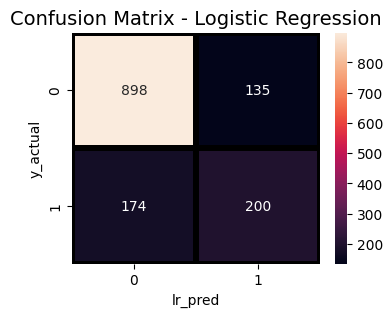

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(label_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Confusion Matrix - Logistic Regression",fontsize=14)
plt.xlabel('lr_pred')
plt.ylabel('y_actual')
plt.show()

ROC Curve

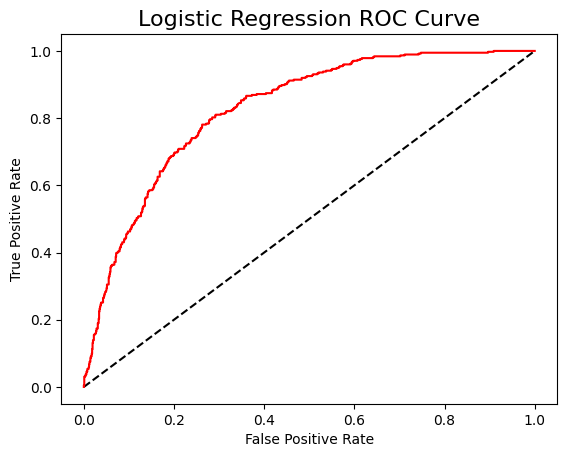

In [ ]:
y_pred_prob = lr_model.predict_proba(test_df)[:,1]
fpr, tpr, thresholds = roc_curve(label_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': train_df.columns,
    'Coefficient': model.coef_[0]  # For binary classification
})

# For multi-class classification, handle each class's coefficients
# Example for class-wise coefficients:
if model.coef_.shape[0] > 1:  # Multi-class case
    for i, class_coef in enumerate(model.coef_):
        print(f"Class {i} Feature Importances:")
        print(pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': class_coef
        }).sort_values(by='Coefficient', ascending=False))

# Sort by absolute value of coefficients to see the most impactful features
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display feature importance
print(feature_importance)

           Feature  Coefficient  Absolute_Coefficient
3         Contract    -0.810667              0.810667
0    SeniorCitizen     0.353854              0.353854
4   OnlineSecurity    -0.333382              0.333382
5      TechSupport    -0.291354              0.291354
7    PaymentMethod     0.085630              0.085630
6  InternetService     0.034871              0.034871
1           tenure    -0.031507              0.031507
2   MonthlyCharges     0.025687              0.025687


<ipython-input-141-e4348103572e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




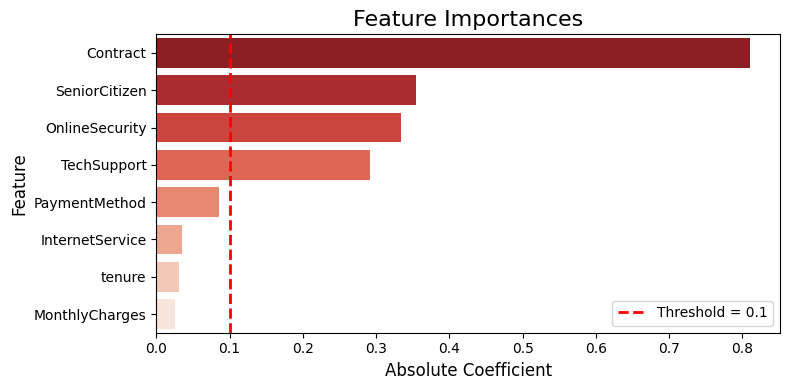

In [ ]:
threshold = 0.1
plt.figure(figsize=(8, 4))
sns.barplot(
    data=feature_importance,
    x='Absolute_Coefficient',
    y='Feature',
    palette='Reds_r'
)

# Add a vertical threshold line (if needed)
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

# Add plot details
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Absolute Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()